In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Create a Train Test Split

Use `koi_disposition` for the y values

In [3]:
from sklearn.model_selection import train_test_split
y = df["koi_disposition"]
X = df.drop(columns=["koi_disposition"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [4]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5964,1,0,0,0,252.044440,0.027490,-0.027490,265.2010,0.0494,-0.0494,...,-136.0,4.621,0.041,-0.035,0.664,0.057,-0.059,292.79022,41.948639,15.884
9410,1,0,0,0,371.518520,0.015790,-0.015790,317.6836,0.0339,-0.0339,...,-206.0,4.377,0.101,-0.203,1.089,0.364,-0.145,293.06400,45.034210,13.731
4204,0,0,1,0,8.038670,0.000114,-0.000114,135.3098,0.0123,-0.0123,...,-181.0,4.485,0.050,-0.200,0.975,0.282,-0.101,290.51785,41.238762,14.999
5933,0,0,0,0,18.782160,0.000406,-0.000406,147.8508,0.0148,-0.0148,...,-167.0,4.488,0.048,-0.290,0.940,0.386,-0.087,291.76413,41.860130,14.043
6996,1,0,1,0,12.429716,0.000472,-0.000472,141.2846,0.0420,-0.0420,...,-200.0,4.534,0.037,-0.213,0.905,0.281,-0.088,297.52072,40.585419,15.842


In [24]:
y_train.head()

5964    FALSE POSITIVE
9410    FALSE POSITIVE
4204    FALSE POSITIVE
5933         CANDIDATE
6996    FALSE POSITIVE
Name: koi_disposition, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScater model and fit it to the training data
X_scaler = MinMaxScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Support Vector Machine

In [20]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model2 = SVC(kernel='linear') #poly, rbf
model2.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.8479719426654467
Testing Data Score: 0.8462946020128088


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [22]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid2 = GridSearchCV(model2, param_grid, verbose=3)

In [23]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train)

C:\Users\bbcho\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.840, total=   1.0s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.851, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.836, total=   1.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.840, total=   1.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.851, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.836, total=   1.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.840, total=   1.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.851, total=   1.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.836, total=   1.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   26.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [11]:
# List the best parameters for this dataset
print(grid2.best_params_)
# List the best score
print(grid2.best_score_)

{'C': 10, 'gamma': 0.0001}
0.8690149435803599


## K Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.797
k: 3, Train/Test Score: 0.896/0.813
k: 5, Train/Test Score: 0.873/0.814
k: 7, Train/Test Score: 0.864/0.819
k: 9, Train/Test Score: 0.859/0.822
k: 11, Train/Test Score: 0.852/0.817
k: 13, Train/Test Score: 0.848/0.819
k: 15, Train/Test Score: 0.844/0.822
k: 17, Train/Test Score: 0.844/0.821
k: 19, Train/Test Score: 0.843/0.823
k: 21, Train/Test Score: 0.840/0.819
k: 23, Train/Test Score: 0.839/0.822
k: 25, Train/Test Score: 0.836/0.824
k: 27, Train/Test Score: 0.836/0.823
k: 29, Train/Test Score: 0.834/0.827
k: 31, Train/Test Score: 0.832/0.826
k: 33, Train/Test Score: 0.832/0.824
k: 35, Train/Test Score: 0.831/0.826
k: 37, Train/Test Score: 0.831/0.827
k: 39, Train/Test Score: 0.828/0.827
k: 41, Train/Test Score: 0.829/0.824
k: 43, Train/Test Score: 0.829/0.826
k: 45, Train/Test Score: 0.830/0.823
k: 47, Train/Test Score: 0.830/0.821
k: 49, Train/Test Score: 0.829/0.820


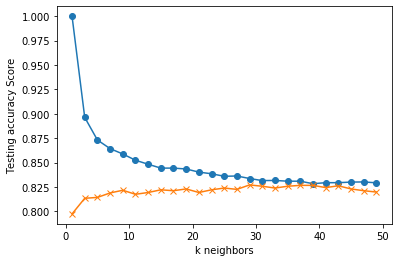

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [40]:
# Note that k: 30 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train_scaled, y_train)
print('k=30 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=30 Test Acc: 0.826


## Sequential Model

In [43]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Label-encode data set for y
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Convert encoded labels to binary values for y for deep learning
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [44]:
y_train_categorical

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [45]:
y_test_categorical

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [46]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=40))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [47]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 14,503
Trainable params: 14,503
Non-trainable params: 0
_________________________________________________________________


In [49]:
#Fit the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

W0716 21:31:07.588070 15600 deprecation.py:323] From C:\Users\bbcho\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 6558 samples
Epoch 1/1000
6558/6558 - 1s - loss: 0.5383 - accuracy: 0.7367
Epoch 2/1000
6558/6558 - 0s - loss: 0.3659 - accuracy: 0.8074
Epoch 3/1000
6558/6558 - 1s - loss: 0.3475 - accuracy: 0.8228
Epoch 4/1000
6558/6558 - 0s - loss: 0.3528 - accuracy: 0.8187
Epoch 5/1000
6558/6558 - 0s - loss: 0.3351 - accuracy: 0.8356
Epoch 6/1000
6558/6558 - 1s - loss: 0.3356 - accuracy: 0.8346
Epoch 7/1000
6558/6558 - 1s - loss: 0.3240 - accuracy: 0.8449
Epoch 8/1000
6558/6558 - 1s - loss: 0.3193 - accuracy: 0.8554
Epoch 9/1000
6558/6558 - 1s - loss: 0.3132 - accuracy: 0.8551
Epoch 10/1000
6558/6558 - 1s - loss: 0.3139 - accuracy: 0.8529
Epoch 11/1000
6558/6558 - 1s - loss: 0.3038 - accuracy: 0.8603
Epoch 12/1000
6558/6558 - 1s - loss: 0.3001 - accuracy: 0.8657
Epoch 13/1000
6558/6558 - 1s - loss: 0.2947 - accuracy: 0.8672
Epoch 14/1000
6558/6558 - 1s - loss: 0.2933 - accuracy: 0.8711
Epoch 15/1000
6558/6558 - 1s - loss: 0.2876 - accuracy: 0.8747
Epoch 16/1000
6558/6558 - 1s - loss: 0.290

Epoch 131/1000
6558/6558 - 1s - loss: 0.2068 - accuracy: 0.9084
Epoch 132/1000
6558/6558 - 0s - loss: 0.2083 - accuracy: 0.9065
Epoch 133/1000
6558/6558 - 0s - loss: 0.2020 - accuracy: 0.9132
Epoch 134/1000
6558/6558 - 0s - loss: 0.2045 - accuracy: 0.9099
Epoch 135/1000
6558/6558 - 1s - loss: 0.2041 - accuracy: 0.9119
Epoch 136/1000
6558/6558 - 1s - loss: 0.1999 - accuracy: 0.9116
Epoch 137/1000
6558/6558 - 1s - loss: 0.2000 - accuracy: 0.9100
Epoch 138/1000
6558/6558 - 0s - loss: 0.1995 - accuracy: 0.9111
Epoch 139/1000
6558/6558 - 0s - loss: 0.1993 - accuracy: 0.9148
Epoch 140/1000
6558/6558 - 0s - loss: 0.2000 - accuracy: 0.9123
Epoch 141/1000
6558/6558 - 0s - loss: 0.1977 - accuracy: 0.9134
Epoch 142/1000
6558/6558 - 0s - loss: 0.2023 - accuracy: 0.9125
Epoch 143/1000
6558/6558 - 0s - loss: 0.2000 - accuracy: 0.9111
Epoch 144/1000
6558/6558 - 0s - loss: 0.1994 - accuracy: 0.9125
Epoch 145/1000
6558/6558 - 1s - loss: 0.2055 - accuracy: 0.9108
Epoch 146/1000
6558/6558 - 0s - loss: 0.

6558/6558 - 1s - loss: 0.1655 - accuracy: 0.9273
Epoch 260/1000
6558/6558 - 1s - loss: 0.1565 - accuracy: 0.9299
Epoch 261/1000
6558/6558 - 1s - loss: 0.1616 - accuracy: 0.9267
Epoch 262/1000
6558/6558 - 0s - loss: 0.1589 - accuracy: 0.9286
Epoch 263/1000
6558/6558 - 0s - loss: 0.1534 - accuracy: 0.9335
Epoch 264/1000
6558/6558 - 0s - loss: 0.1562 - accuracy: 0.9320
Epoch 265/1000
6558/6558 - 0s - loss: 0.1532 - accuracy: 0.9306
Epoch 266/1000
6558/6558 - 0s - loss: 0.1574 - accuracy: 0.9320
Epoch 267/1000
6558/6558 - 0s - loss: 0.1542 - accuracy: 0.9335
Epoch 268/1000
6558/6558 - 0s - loss: 0.1645 - accuracy: 0.9288
Epoch 269/1000
6558/6558 - 0s - loss: 0.1523 - accuracy: 0.9324
Epoch 270/1000
6558/6558 - 1s - loss: 0.1506 - accuracy: 0.9331
Epoch 271/1000
6558/6558 - 1s - loss: 0.1582 - accuracy: 0.9248
Epoch 272/1000
6558/6558 - 1s - loss: 0.1512 - accuracy: 0.9353
Epoch 273/1000
6558/6558 - 0s - loss: 0.1561 - accuracy: 0.9309
Epoch 274/1000
6558/6558 - 0s - loss: 0.1549 - accuracy

Epoch 388/1000
6558/6558 - 0s - loss: 0.1144 - accuracy: 0.9500
Epoch 389/1000
6558/6558 - 0s - loss: 0.1195 - accuracy: 0.9474
Epoch 390/1000
6558/6558 - 0s - loss: 0.1156 - accuracy: 0.9485
Epoch 391/1000
6558/6558 - 0s - loss: 0.1137 - accuracy: 0.9500
Epoch 392/1000
6558/6558 - 0s - loss: 0.1188 - accuracy: 0.9485
Epoch 393/1000
6558/6558 - 0s - loss: 0.1159 - accuracy: 0.9497
Epoch 394/1000
6558/6558 - 0s - loss: 0.1177 - accuracy: 0.9492
Epoch 395/1000
6558/6558 - 0s - loss: 0.1123 - accuracy: 0.9512
Epoch 396/1000
6558/6558 - 0s - loss: 0.1103 - accuracy: 0.9518
Epoch 397/1000
6558/6558 - 1s - loss: 0.1149 - accuracy: 0.9509
Epoch 398/1000
6558/6558 - 0s - loss: 0.1148 - accuracy: 0.9501
Epoch 399/1000
6558/6558 - 0s - loss: 0.1136 - accuracy: 0.9509
Epoch 400/1000
6558/6558 - 0s - loss: 0.1110 - accuracy: 0.9535
Epoch 401/1000
6558/6558 - 0s - loss: 0.1044 - accuracy: 0.9579
Epoch 402/1000
6558/6558 - 0s - loss: 0.1174 - accuracy: 0.9471
Epoch 403/1000
6558/6558 - 0s - loss: 0.

6558/6558 - 0s - loss: 0.0905 - accuracy: 0.9626
Epoch 517/1000
6558/6558 - 0s - loss: 0.0783 - accuracy: 0.9680
Epoch 518/1000
6558/6558 - 0s - loss: 0.0901 - accuracy: 0.9616
Epoch 519/1000
6558/6558 - 0s - loss: 0.0814 - accuracy: 0.9654
Epoch 520/1000
6558/6558 - 0s - loss: 0.0847 - accuracy: 0.9660
Epoch 521/1000
6558/6558 - 0s - loss: 0.0807 - accuracy: 0.9655
Epoch 522/1000
6558/6558 - 0s - loss: 0.0810 - accuracy: 0.9675
Epoch 523/1000
6558/6558 - 1s - loss: 0.0816 - accuracy: 0.9658
Epoch 524/1000
6558/6558 - 1s - loss: 0.0809 - accuracy: 0.9668
Epoch 525/1000
6558/6558 - 0s - loss: 0.0839 - accuracy: 0.9669
Epoch 526/1000
6558/6558 - 0s - loss: 0.0864 - accuracy: 0.9636
Epoch 527/1000
6558/6558 - 0s - loss: 0.0870 - accuracy: 0.9651
Epoch 528/1000
6558/6558 - 0s - loss: 0.0907 - accuracy: 0.9614
Epoch 529/1000
6558/6558 - 0s - loss: 0.0855 - accuracy: 0.9658
Epoch 530/1000
6558/6558 - 0s - loss: 0.0787 - accuracy: 0.9663
Epoch 531/1000
6558/6558 - 0s - loss: 0.0841 - accuracy

Epoch 645/1000
6558/6558 - 0s - loss: 0.0687 - accuracy: 0.9727
Epoch 646/1000
6558/6558 - 0s - loss: 0.0615 - accuracy: 0.9765
Epoch 647/1000
6558/6558 - 0s - loss: 0.0544 - accuracy: 0.9774
Epoch 648/1000
6558/6558 - 1s - loss: 0.0548 - accuracy: 0.9785
Epoch 649/1000
6558/6558 - 0s - loss: 0.0661 - accuracy: 0.9721
Epoch 650/1000
6558/6558 - 0s - loss: 0.0621 - accuracy: 0.9753
Epoch 651/1000
6558/6558 - 0s - loss: 0.0570 - accuracy: 0.9790
Epoch 652/1000
6558/6558 - 0s - loss: 0.0579 - accuracy: 0.9771
Epoch 653/1000
6558/6558 - 0s - loss: 0.0576 - accuracy: 0.9754
Epoch 654/1000
6558/6558 - 0s - loss: 0.0621 - accuracy: 0.9741
Epoch 655/1000
6558/6558 - 0s - loss: 0.0883 - accuracy: 0.9648
Epoch 656/1000
6558/6558 - 0s - loss: 0.0689 - accuracy: 0.9736
Epoch 657/1000
6558/6558 - 0s - loss: 0.0507 - accuracy: 0.9811
Epoch 658/1000
6558/6558 - 0s - loss: 0.0571 - accuracy: 0.9788
Epoch 659/1000
6558/6558 - 0s - loss: 0.0664 - accuracy: 0.9722
Epoch 660/1000
6558/6558 - 1s - loss: 0.

6558/6558 - 0s - loss: 0.0533 - accuracy: 0.9768
Epoch 774/1000
6558/6558 - 0s - loss: 0.0587 - accuracy: 0.9783
Epoch 775/1000
6558/6558 - 1s - loss: 0.0380 - accuracy: 0.9870
Epoch 776/1000
6558/6558 - 0s - loss: 0.0415 - accuracy: 0.9849
Epoch 777/1000
6558/6558 - 0s - loss: 0.0407 - accuracy: 0.9846
Epoch 778/1000
6558/6558 - 0s - loss: 0.0358 - accuracy: 0.9863
Epoch 779/1000
6558/6558 - 0s - loss: 0.0431 - accuracy: 0.9831
Epoch 780/1000
6558/6558 - 0s - loss: 0.0402 - accuracy: 0.9858
Epoch 781/1000
6558/6558 - 0s - loss: 0.0479 - accuracy: 0.9819
Epoch 782/1000
6558/6558 - 0s - loss: 0.0437 - accuracy: 0.9834
Epoch 783/1000
6558/6558 - 0s - loss: 0.0473 - accuracy: 0.9809
Epoch 784/1000
6558/6558 - 0s - loss: 0.0461 - accuracy: 0.9828
Epoch 785/1000
6558/6558 - 0s - loss: 0.0519 - accuracy: 0.9806
Epoch 786/1000
6558/6558 - 1s - loss: 0.0371 - accuracy: 0.9860
Epoch 787/1000
6558/6558 - 1s - loss: 0.0357 - accuracy: 0.9860
Epoch 788/1000
6558/6558 - 0s - loss: 0.0364 - accuracy

Epoch 902/1000
6558/6558 - 0s - loss: 0.0321 - accuracy: 0.9892
Epoch 903/1000
6558/6558 - 0s - loss: 0.0463 - accuracy: 0.9808
Epoch 904/1000
6558/6558 - 0s - loss: 0.0288 - accuracy: 0.9901
Epoch 905/1000
6558/6558 - 0s - loss: 0.0384 - accuracy: 0.9843
Epoch 906/1000
6558/6558 - 0s - loss: 0.0262 - accuracy: 0.9913
Epoch 907/1000
6558/6558 - 0s - loss: 0.0264 - accuracy: 0.9909
Epoch 908/1000
6558/6558 - 0s - loss: 0.0783 - accuracy: 0.9704
Epoch 909/1000
6558/6558 - 0s - loss: 0.0358 - accuracy: 0.9880
Epoch 910/1000
6558/6558 - 0s - loss: 0.0212 - accuracy: 0.9947
Epoch 911/1000
6558/6558 - 0s - loss: 0.0287 - accuracy: 0.9892
Epoch 912/1000
6558/6558 - 1s - loss: 0.0430 - accuracy: 0.9814
Epoch 913/1000
6558/6558 - 1s - loss: 0.0439 - accuracy: 0.9837
Epoch 914/1000
6558/6558 - 0s - loss: 0.0515 - accuracy: 0.9805
Epoch 915/1000
6558/6558 - 0s - loss: 0.0266 - accuracy: 0.9925
Epoch 916/1000
6558/6558 - 0s - loss: 0.0234 - accuracy: 0.9918
Epoch 917/1000
6558/6558 - 0s - loss: 0.

In [50]:
#Quantify the Deep Learning Trained Model
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

2186/2186 - 0s - loss: 0.8120 - accuracy: 0.8673
Normal Neural Network - Loss: 0.8120301904093751, Accuracy: 0.8673375844955444


In [51]:
#Make Deep Learning Predictions
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:6])}")

Predicted classes: ['FALSE POSITIVE' 'CONFIRMED' 'CONFIRMED' ... 'CANDIDATE' 'FALSE POSITIVE'
 'CONFIRMED']
Actual Labels: ['FALSE POSITIVE', 'CANDIDATE', 'CONFIRMED', 'CANDIDATE', 'CANDIDATE', 'FALSE POSITIVE']
